In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
import seaborn as sns

In [ ]:
import nltk

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tweet_emotions.csv')

In [ ]:
df

tweet_id   sentiment  \
0      1956967341       empty   
1      1956967666     sadness   
2      1956967696     sadness   
3      1956967789  enthusiasm   
4      1956968416     neutral   
...           ...         ...   
39995  1753918954     neutral   
39996  1753919001        love   
39997  1753919005        love   
39998  1753919043   happiness   
39999  1753919049        love   

                                                 content  
0      @tiffanylue i know  i was listenin to bad habi...  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4      @dannycastillo We want to trade with someone w...  
...                                                  ...  
39995                                   @JohnLloydTaylor  
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the mommies out ther...  
39998  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...  
39999  @mopedronin bullet train from tokyo    the gf ...  

[40000 rows x 3 columns]

In [ ]:
df.sample(5)

tweet_id   sentiment  \
31370  1751920890        love   
26647  1695476934       worry   
716    1957132397       worry   
10299  1962872216  enthusiasm   
36447  1753311804        love   

                                                 content  
31370  @nicksantino i love youuuuu nick santino! thir...  
26647  @andymooseman Yeah. About damn time. My film S...  
716    Gosh. Today's weather is HOrriTerrible! Extrem...  
10299  I'm sick of being sick. The weekend is here an...  
36447                        great night! great peolple!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [ ]:
df.shape

(40000, 3)

# Steps
## 1. Data Cleaning
## 2. EDA
## 3. Text preprocessing
## 4. Model building
## 5. Evaluation
## 6. Website deployment

# 1. Data Cleaning

In [ ]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [ ]:
# tweet_id column has no signification in this emotion detection model. 
# So I'm dropping it.

df.drop(columns='tweet_id', inplace= True)

In [ ]:
df.head()

sentiment                                            content
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...

In [ ]:
#missing values
df.isnull().sum()

sentiment    0
content      0
dtype: int64

In [ ]:
# checking for duplicated
df.duplicated().sum()

91

In [ ]:
# dropping duplicate values
df.drop_duplicates(keep='first', inplace= True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(39909, 2)

# 2. EDA

In [ ]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [ ]:
df['sentiment'].value_counts()

neutral       8617
worry         8452
happiness     5194
sadness       5160
love          3801
surprise      2187
fun           1776
relief        1524
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

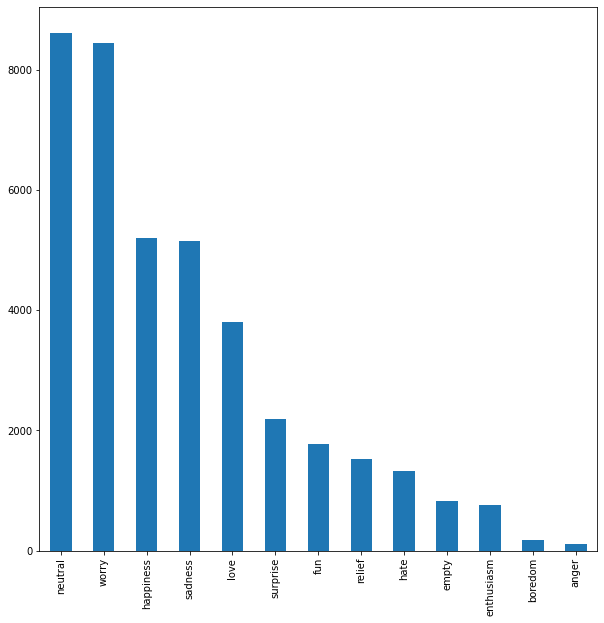

In [ ]:
plt.figure(figsize=(10,10))
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
 nltk.download('punkt') # punkt is the required package for tokenization.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['no_of_characters'] = df['content'].apply(len) # counting the number of characters in each text and adding it as a column.

In [ ]:
df.head()

sentiment                                            content  \
0       empty  @tiffanylue i know  i was listenin to bad habi...   
1     sadness  Layin n bed with a headache  ughhhh...waitin o...   
2     sadness                Funeral ceremony...gloomy friday...   
3  enthusiasm               wants to hang out with friends SOON!   
4     neutral  @dannycastillo We want to trade with someone w...   

   no_of_characters  
0                92  
1                60  
2                35  
3                36  
4                86

In [ ]:
df['no_of_words'] = df['content'].apply(lambda x: len(nltk.word_tokenize(x))) # counting the number of words in each text and adding it as a column.

In [ ]:
df.head()

sentiment                                            content  \
0       empty  @tiffanylue i know  i was listenin to bad habi...   
1     sadness  Layin n bed with a headache  ughhhh...waitin o...   
2     sadness                Funeral ceremony...gloomy friday...   
3  enthusiasm               wants to hang out with friends SOON!   
4     neutral  @dannycastillo We want to trade with someone w...   

   no_of_characters  no_of_words  
0                92           20  
1                60           13  
2                35            6  
3                36            8  
4                86           18

In [ ]:
df['no_of_sentences'] = df['content'].apply(lambda x: len(nltk.sent_tokenize(x))) # counting the number of sentences in each text and adding it as a column.

In [ ]:
df.sample(5)

sentiment                                            content  \
8924     neutral      's hair was on fire right now! Ewww it smells   
11390      worry  I believe a man died in a car wreck today just...   
24551     relief  trying to watch lost online very annoying and ...   
39908  happiness  @rasga Yep: http://bit.ly/15yyId  We go there ...   
7196     neutral  Feeling madly sorry for myself... - ï¿½Iï¿½M S...   

       no_of_characters  no_of_words  no_of_sentences  
8924                 45           11                2  
11390               120           30                2  
24551                74           14                1  
39908                67           14                1  
7196                140           26                1

In [ ]:
df[['no_of_characters', 'no_of_words', 'no_of_sentences']].describe()

no_of_characters   no_of_words  no_of_sentences
count      39909.000000  39909.000000     39909.000000
mean          73.470445     16.460698         1.693628
std           36.521837      8.579700         0.931004
min            1.000000      1.000000         1.000000
25%           43.000000      9.000000         1.000000
50%           69.000000     15.000000         1.000000
75%          103.000000     23.000000         2.000000
max          167.000000    106.000000        20.000000

## Neutral

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


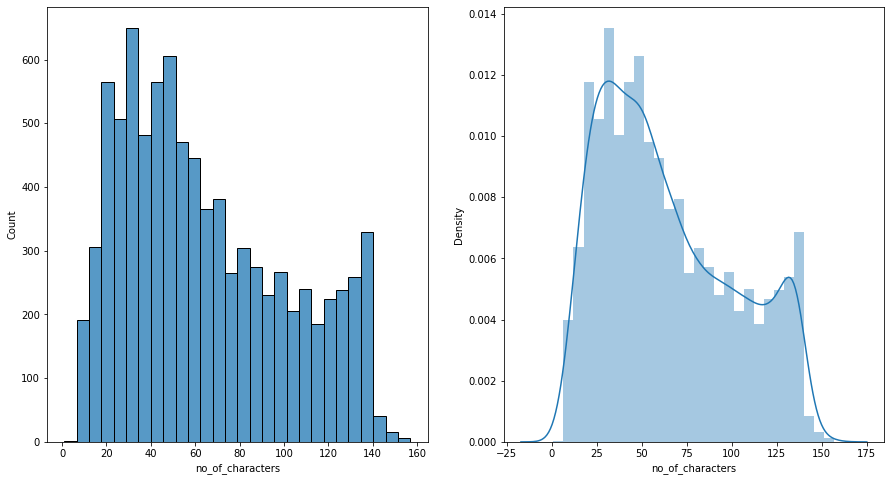

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'neutral']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'neutral']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


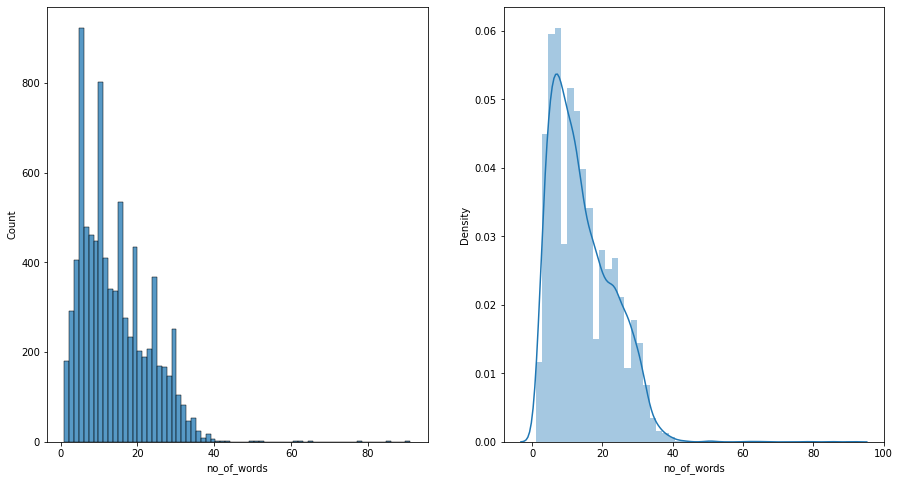

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'neutral']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'neutral']['no_of_words'])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


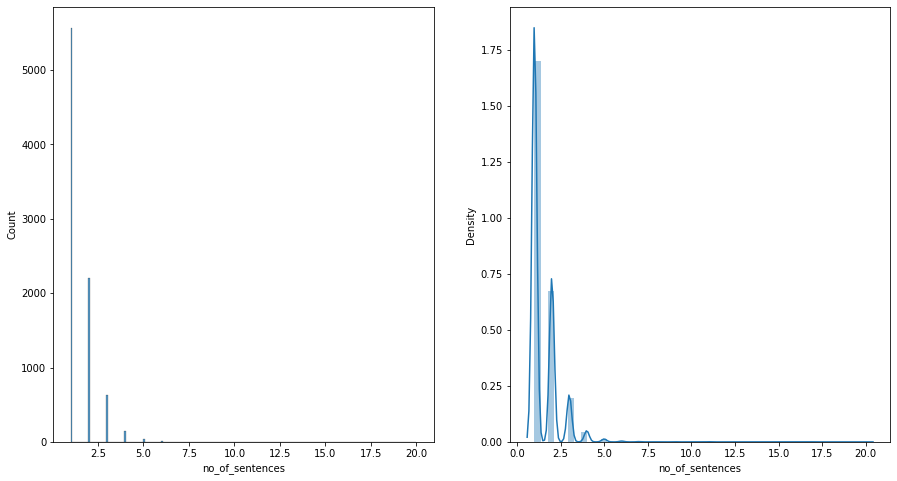

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'neutral']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'neutral']['no_of_sentences'])
plt.show()

## Empty

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


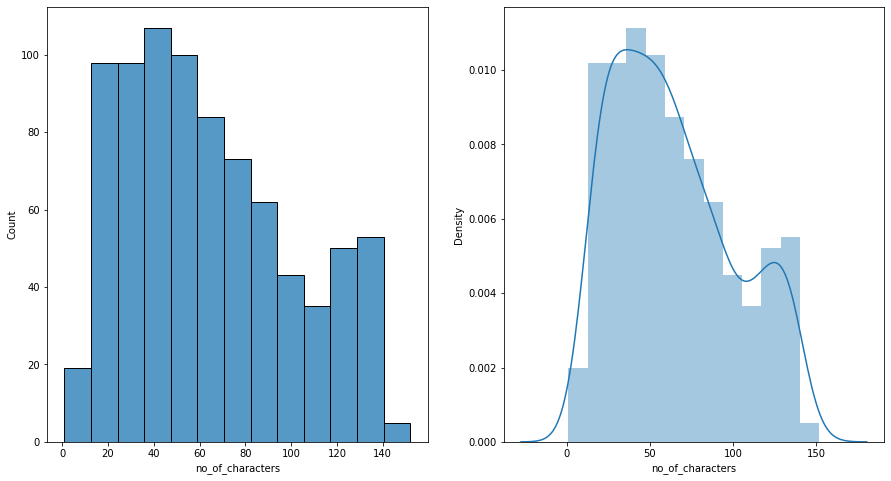

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'empty']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'empty']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


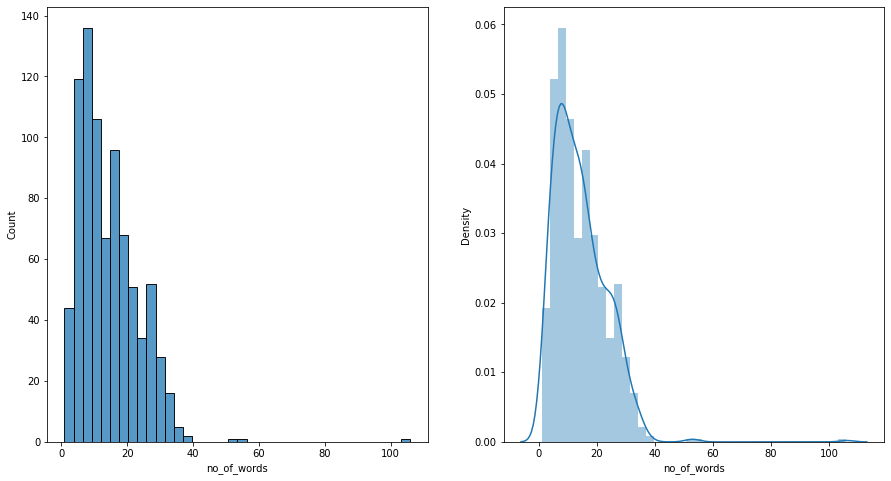

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'empty']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'empty']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


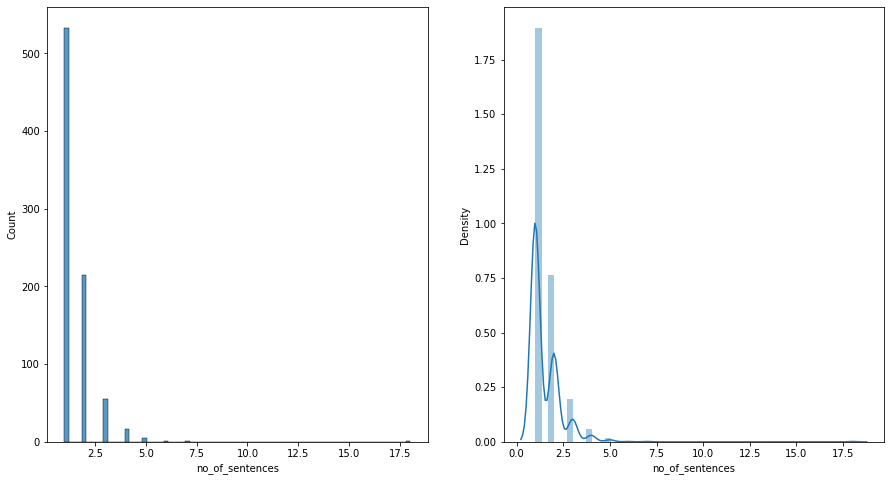

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'empty']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'empty']['no_of_sentences'])
plt.show()

## Worry

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


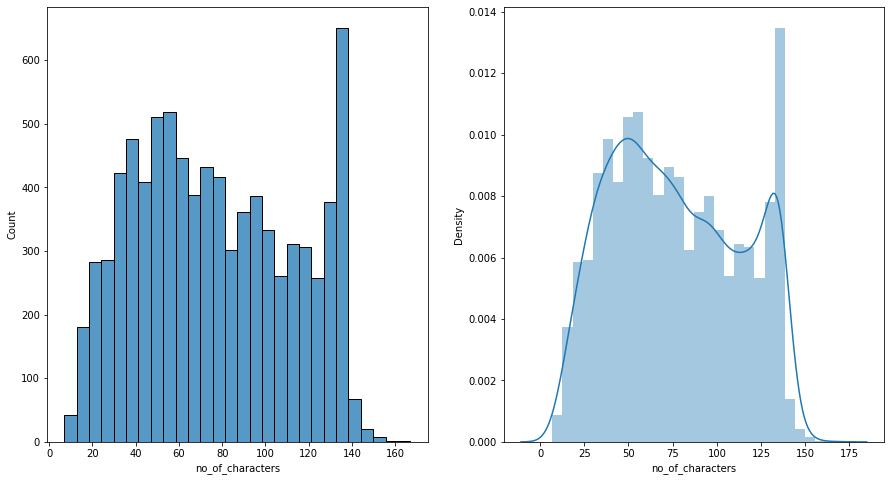

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'worry']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'worry']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


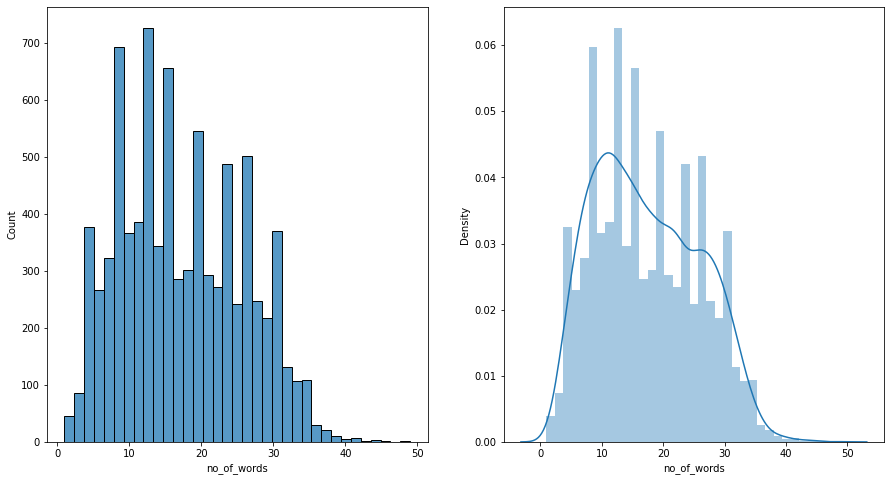

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'worry']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'worry']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


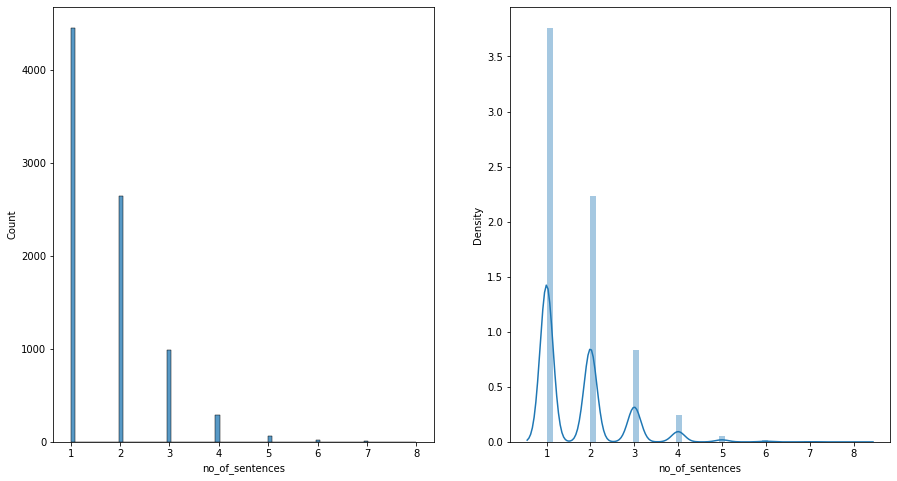

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'worry']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'worry']['no_of_sentences'])
plt.show()

## Happiness

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


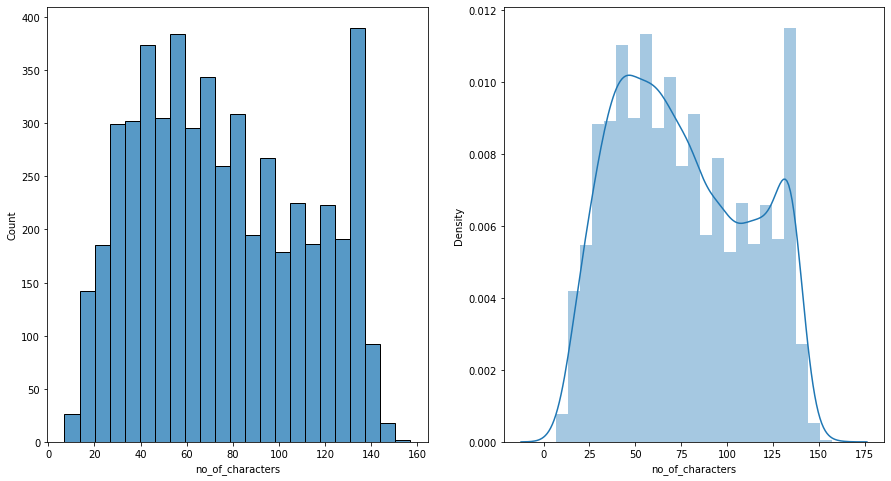

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'happiness']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'happiness']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


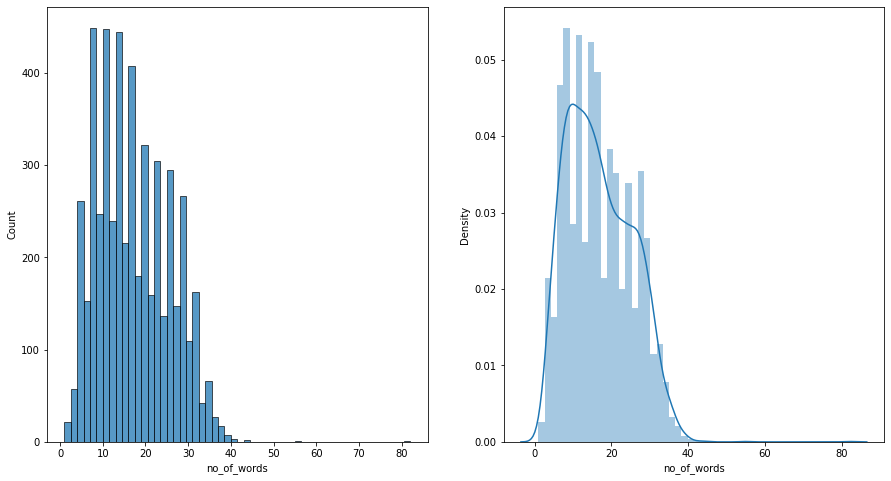

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'happiness']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'happiness']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


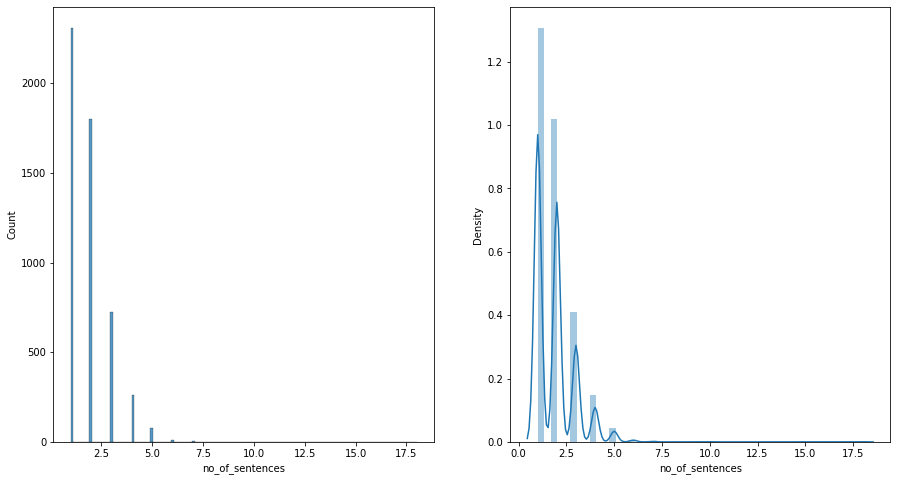

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'happiness']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'happiness']['no_of_sentences'])
plt.show()

## Sadness

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


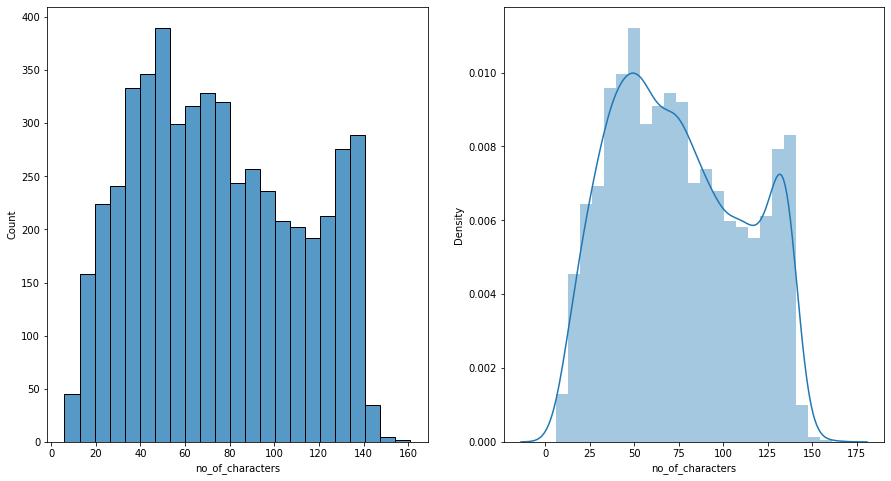

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'sadness']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'sadness']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


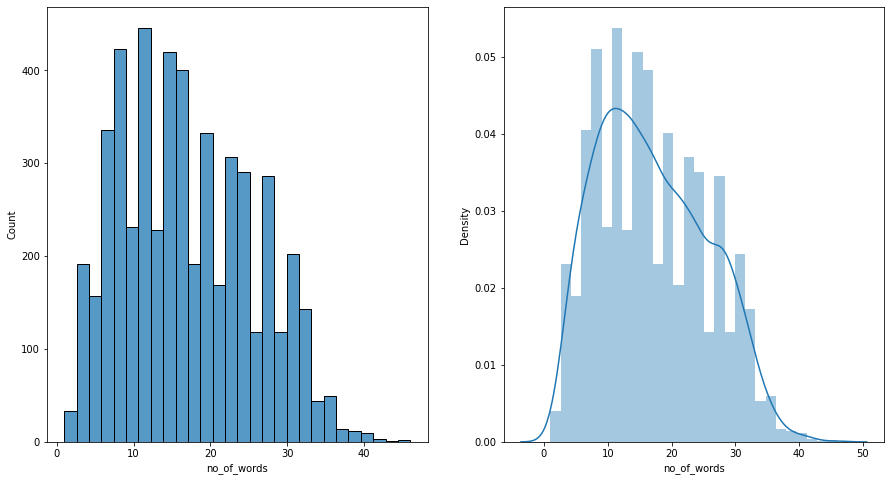

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'sadness']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'sadness']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


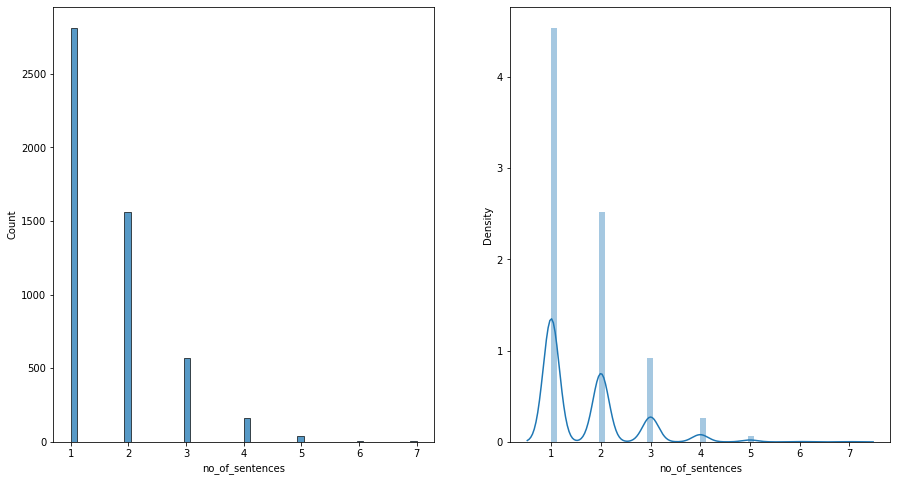

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'sadness']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'sadness']['no_of_sentences'])
plt.show()

## Love

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


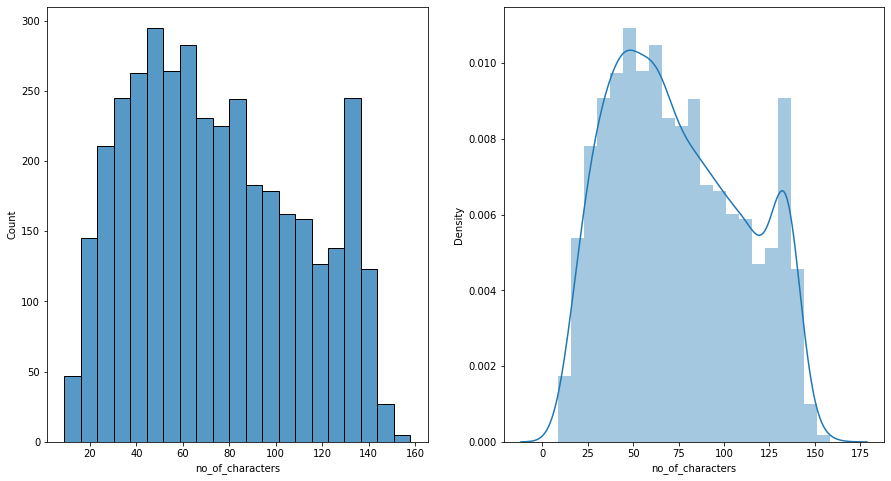

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'love']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'love']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


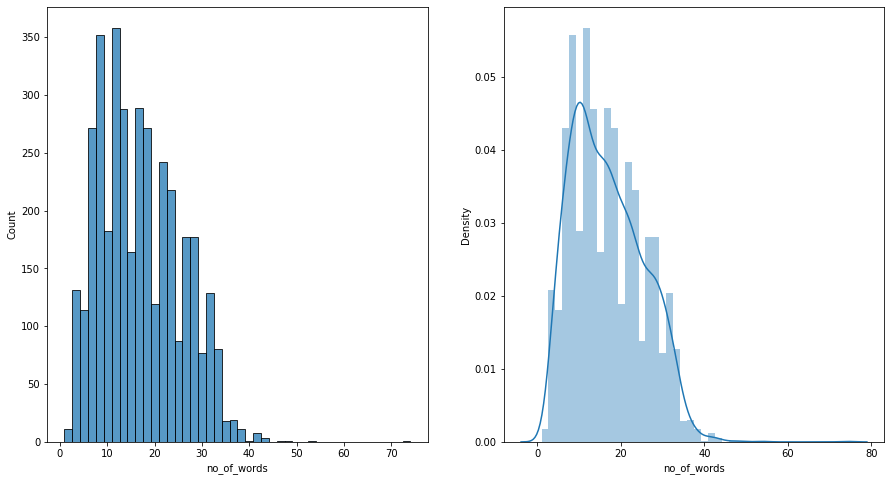

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'love']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'love']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


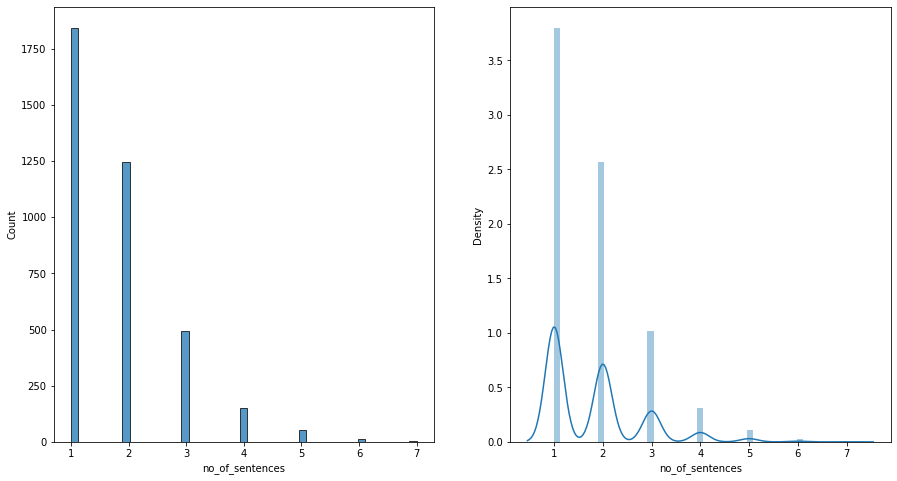

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'love']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'love']['no_of_sentences'])
plt.show()

## Surprise

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


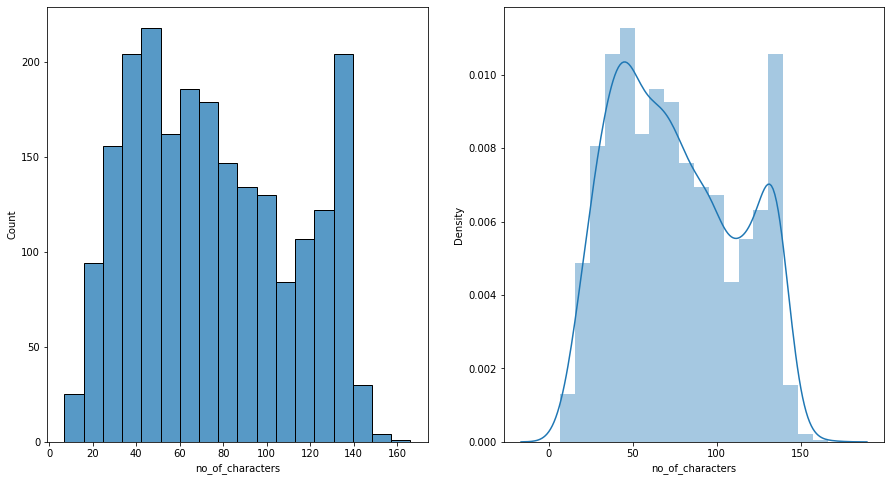

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'surprise']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'surprise']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


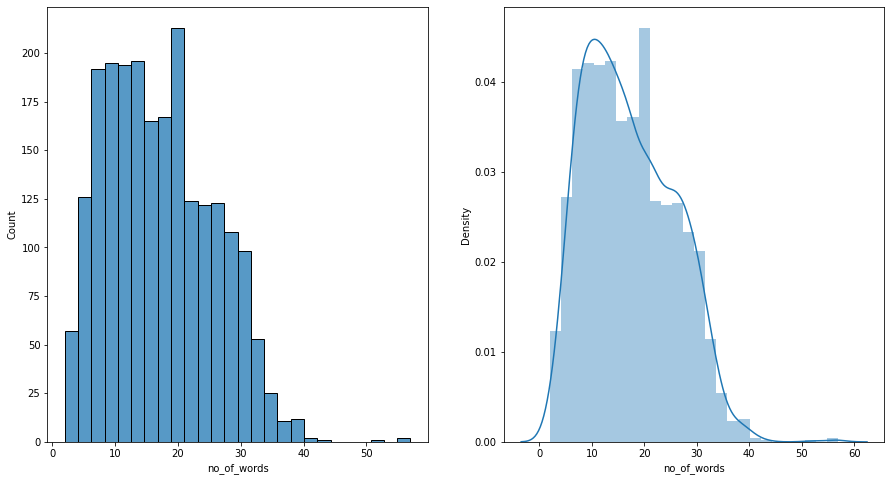

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'surprise']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'surprise']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


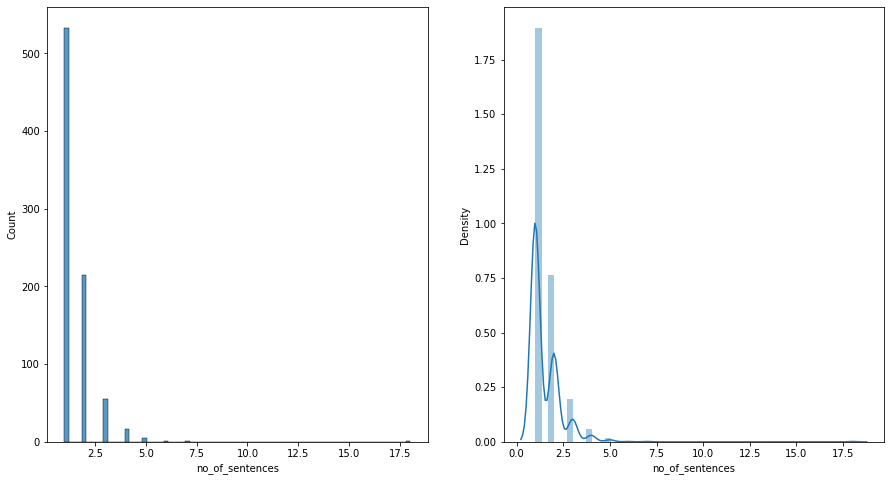

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'empty']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'empty']['no_of_sentences'])
plt.show()

## Fun

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


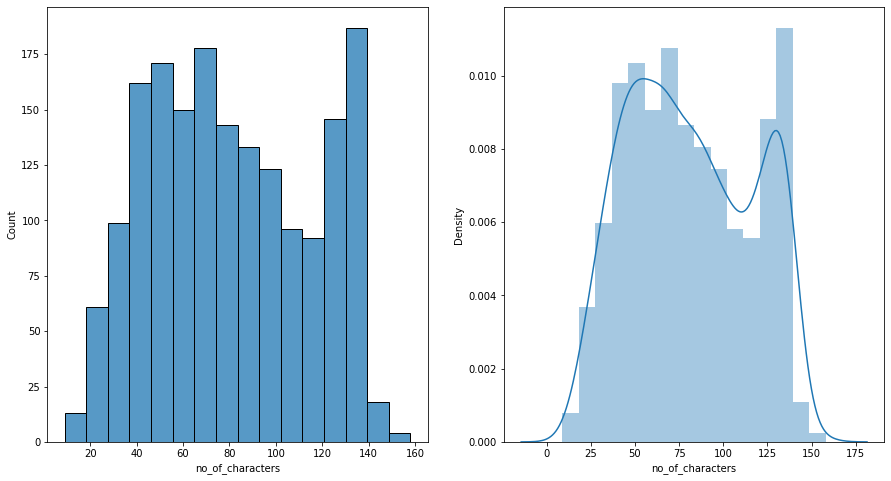

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'fun']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'fun']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


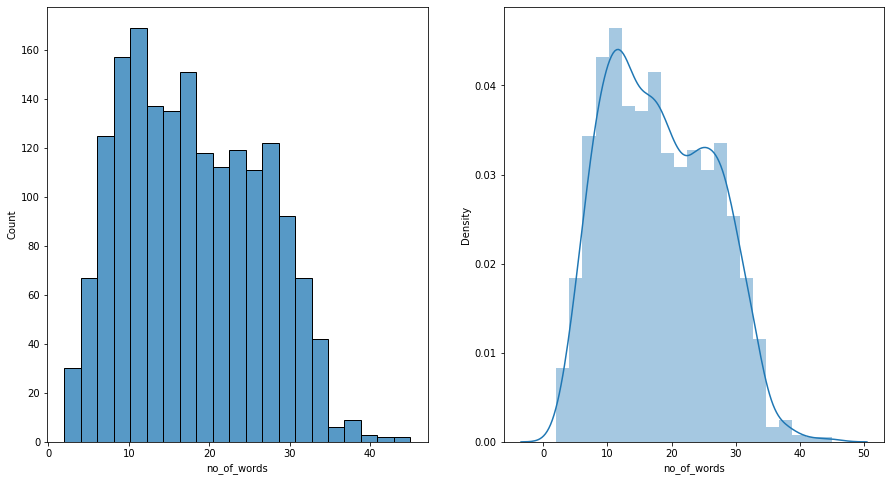

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'fun']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'fun']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


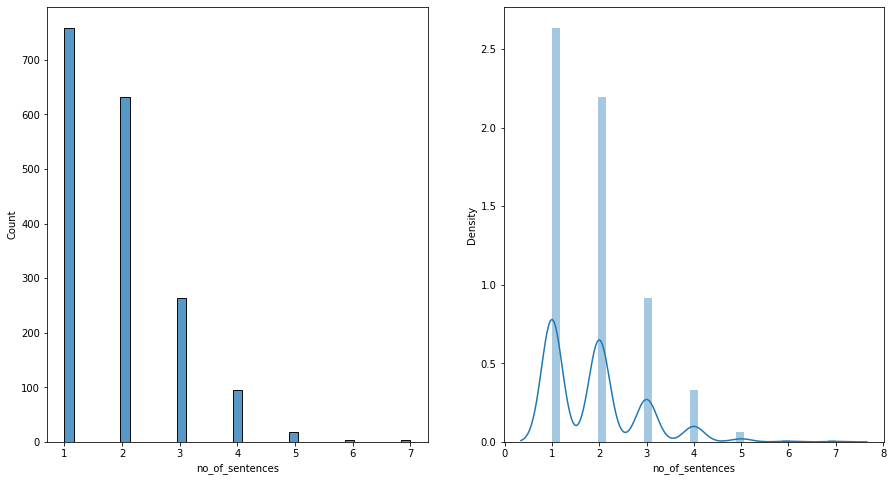

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'fun']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'fun']['no_of_sentences'])
plt.show()

## Relief

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


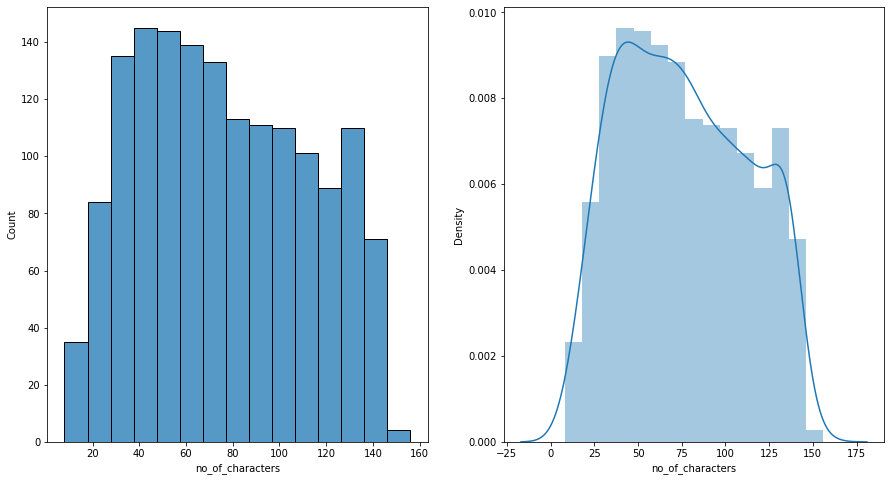

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'relief']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'relief']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


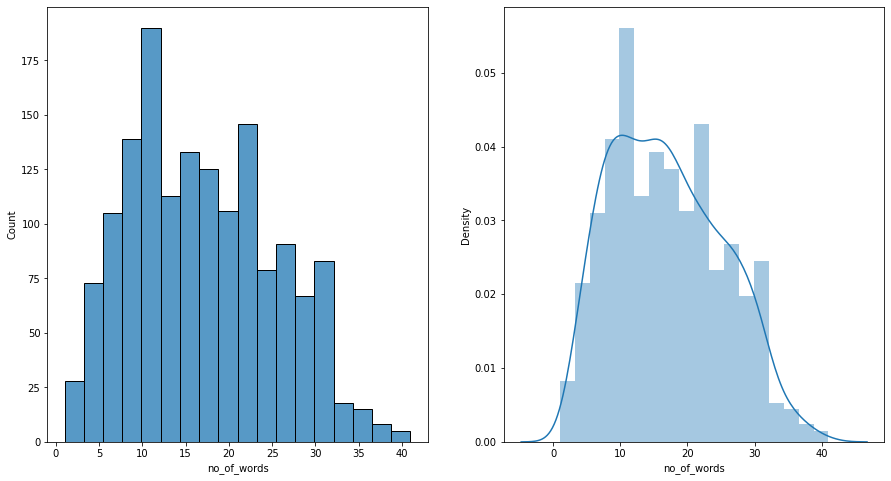

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'relief']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'relief']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


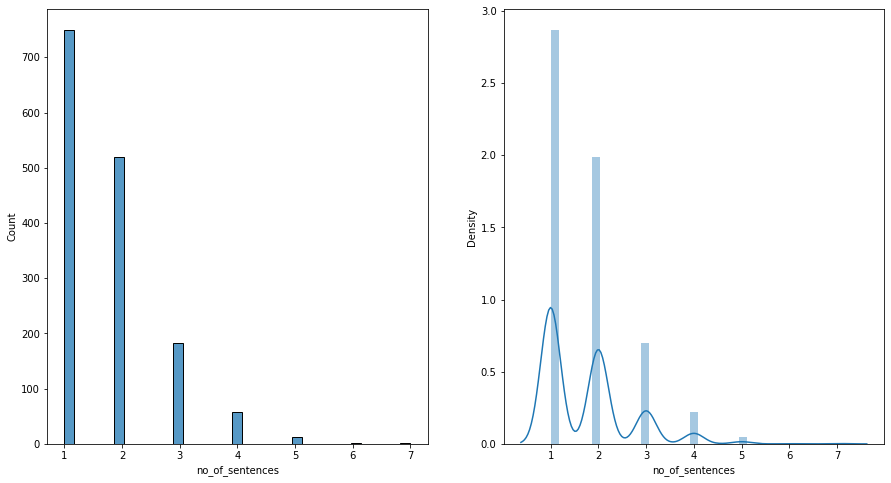

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'relief']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'relief']['no_of_sentences'])
plt.show()

## Hate

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


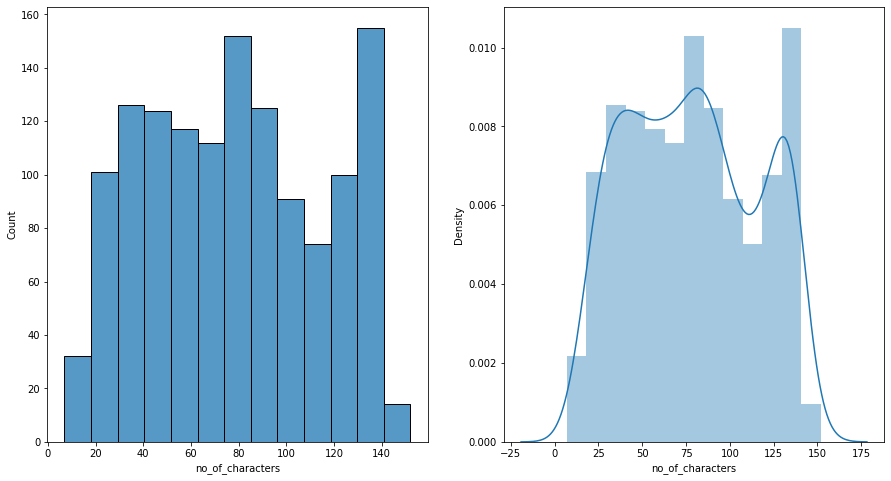

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'hate']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'hate']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


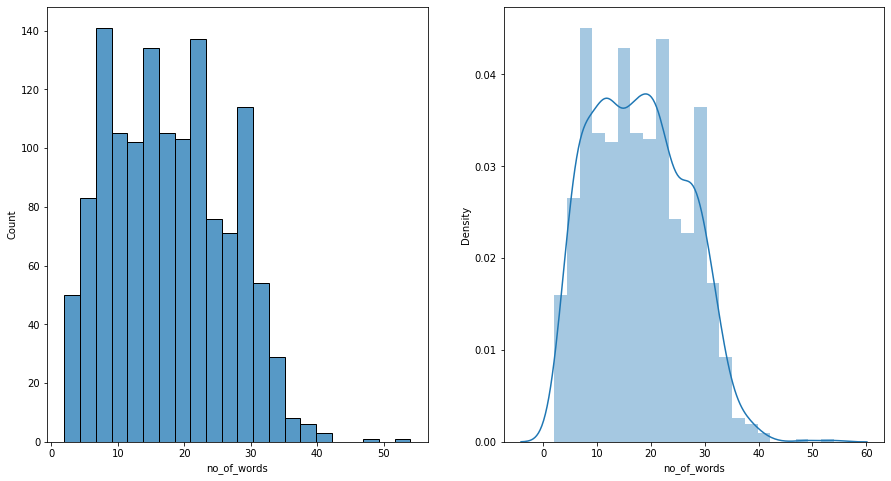

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'hate']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'hate']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


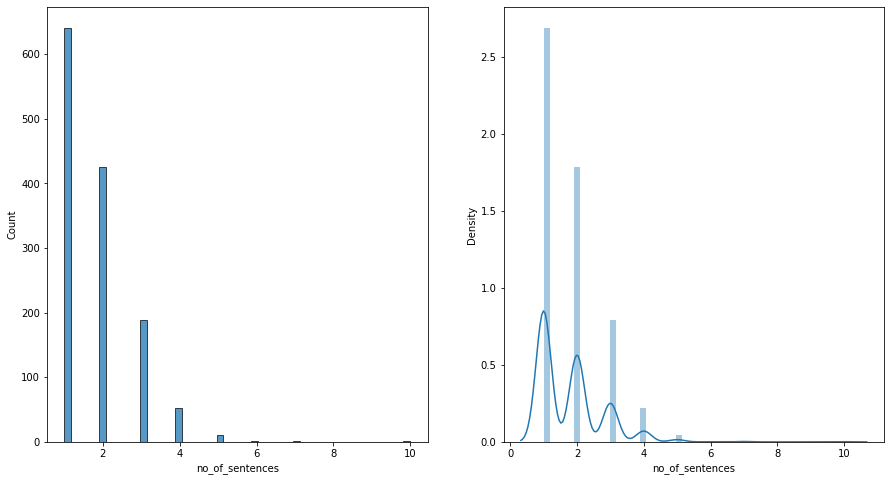

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'hate']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'hate']['no_of_sentences'])
plt.show()

## Enthusiasm

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


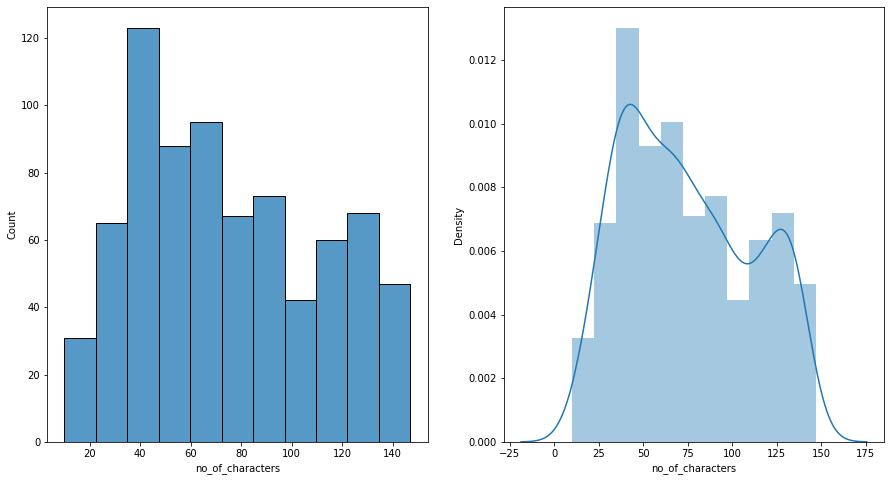

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'enthusiasm']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'enthusiasm']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


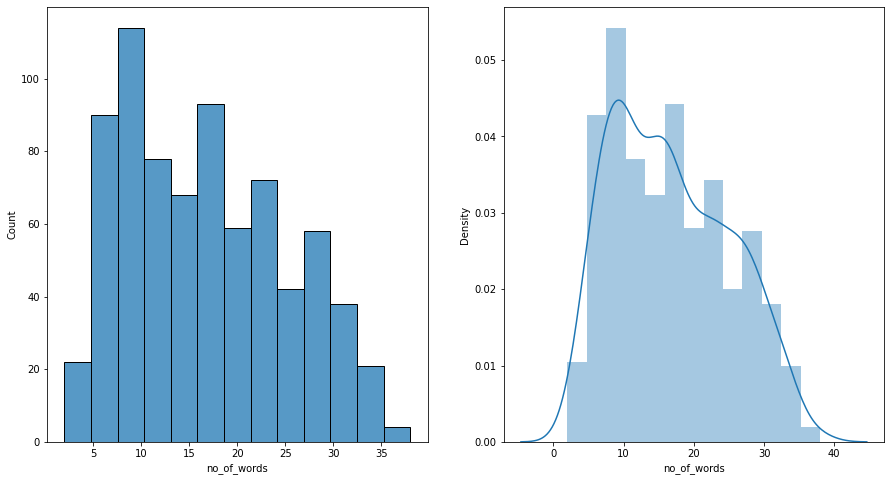

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'enthusiasm']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'enthusiasm']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


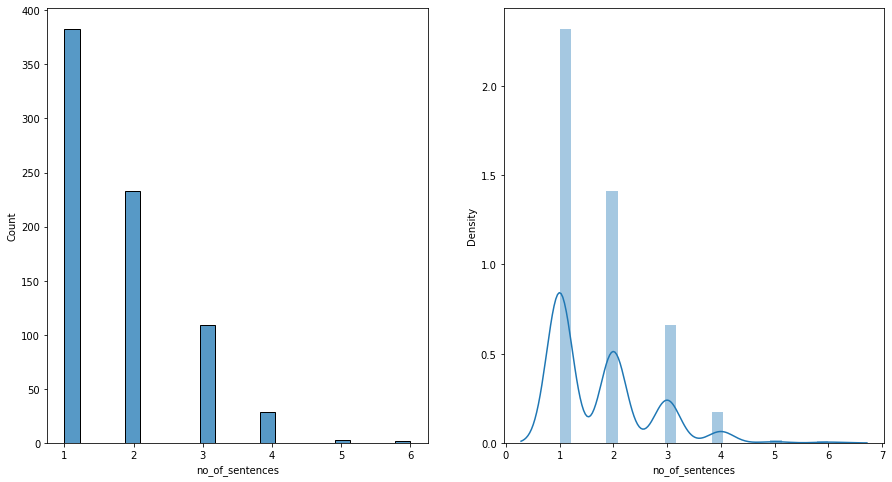

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'enthusiasm']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'enthusiasm']['no_of_sentences'])
plt.show()

## Boredom

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


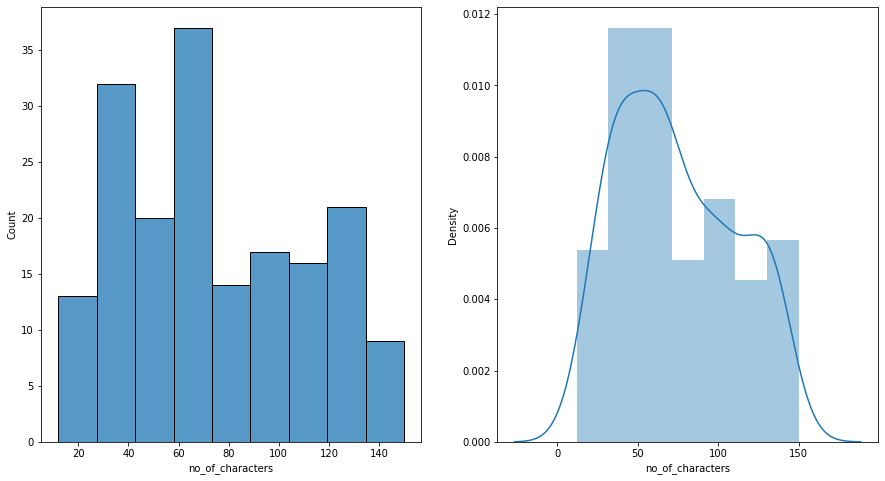

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'boredom']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'boredom']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


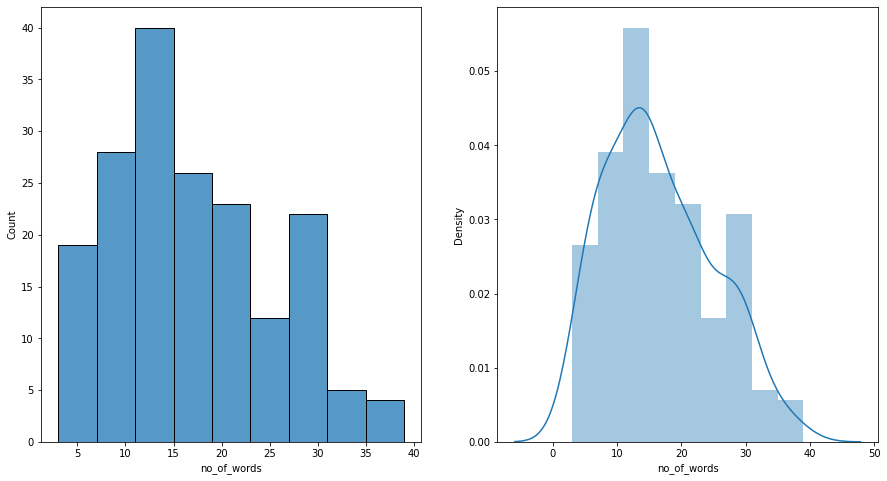

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'boredom']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'boredom']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


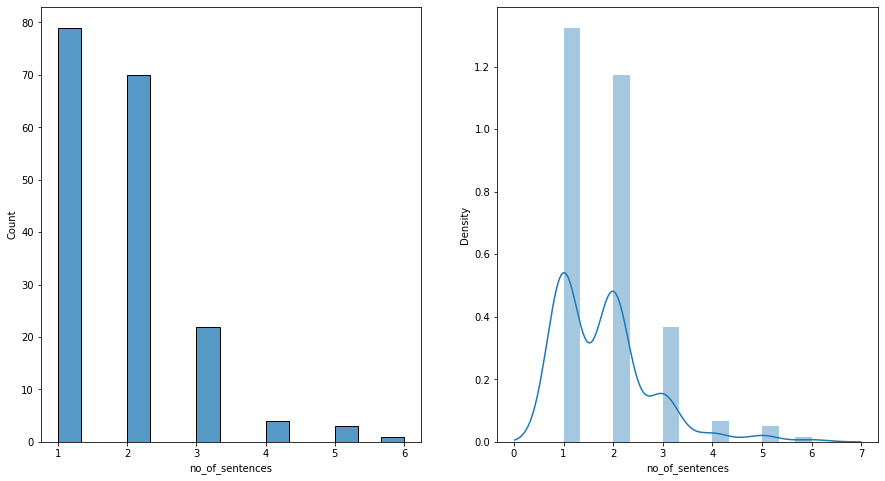

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'boredom']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'boredom']['no_of_sentences'])
plt.show()

## Anger

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


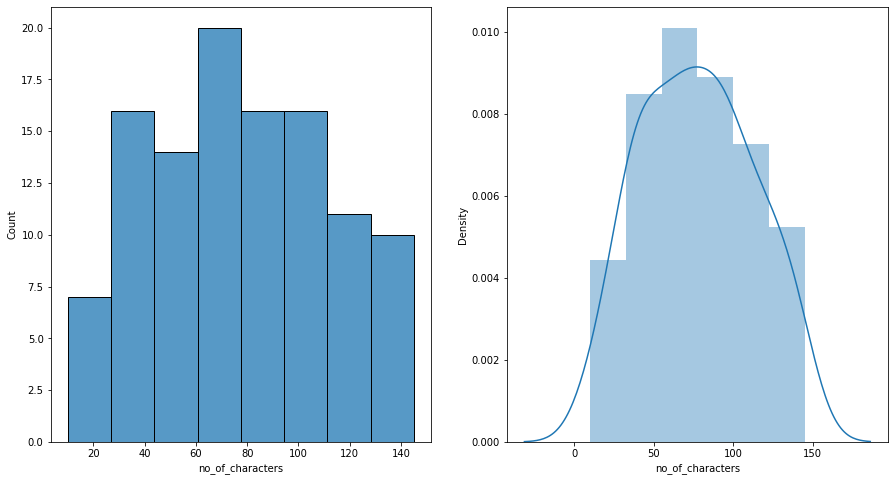

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'anger']['no_of_characters'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'anger']['no_of_characters'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


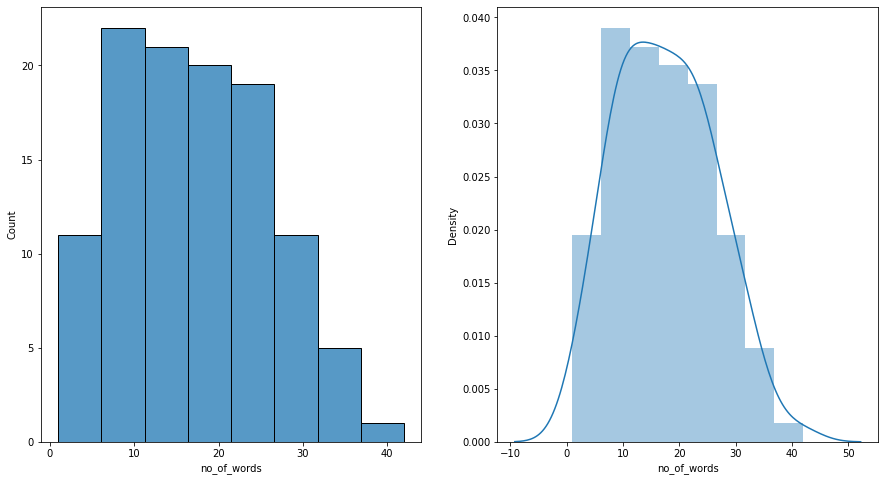

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'anger']['no_of_words'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'anger']['no_of_words'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


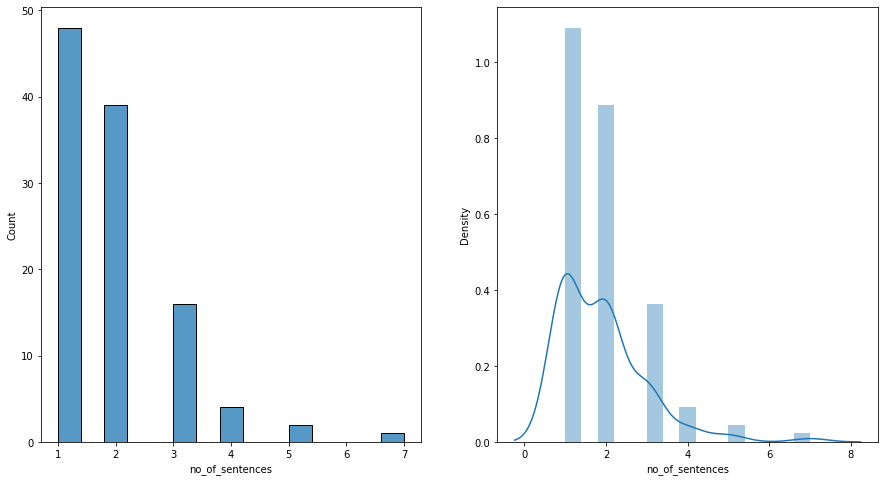

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df[df['sentiment'] == 'anger']['no_of_sentences'])

plt.subplot(1,2,2)
sns.distplot(df[df['sentiment'] == 'anger']['no_of_sentences'])
plt.show()

## Correlation

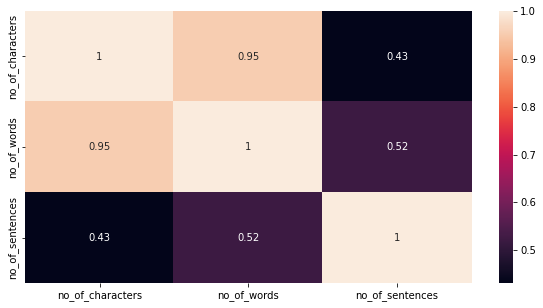

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot= True)

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [ ]:
df.head()

sentiment                                            content  \
0          2  @tiffanylue i know  i was listenin to bad habi...   
1         10  Layin n bed with a headache  ughhhh...waitin o...   
2         10                Funeral ceremony...gloomy friday...   
3          3               wants to hang out with friends SOON!   
4          8  @dannycastillo We want to trade with someone w...   

   no_of_characters  no_of_words  no_of_sentences  
0                92           20                1  
1                60           13                1  
2                35            6                1  
3                36            8                1  
4                86           18                1

In [ ]:
encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12])

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

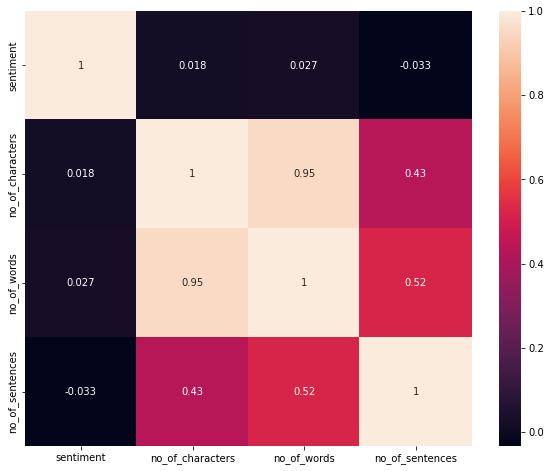

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

# 3. Text Preprocessing

### 1. lower case
### 2. word tokenization
### 3. remove special characters
### 4. remove punctuation
### 5. stemming

In [ ]:
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

In [ ]:
def text_preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    alfa_num = []
    for token in text:
        if token.isalnum():
            alfa_num.append(token)

    text = alfa_num[:]
    alfa_num.clear()

    for token in text:
        if token not in stopwords.words('english'):
            alfa_num.append(token)

    text = alfa_num[:]
    alfa_num.clear()
    
    for token in text:
        alfa_num.append(stemmer.stem(token))

    text = alfa_num[:]
    alfa_num.clear()
    return " ".join(text)

In [ ]:
df['transformed_text'] = df['content'].apply(text_preprocessing)

In [ ]:
df.head(4)

sentiment                                            content  \
0          2  @tiffanylue i know  i was listenin to bad habi...   
1         10  Layin n bed with a headache  ughhhh...waitin o...   
2         10                Funeral ceremony...gloomy friday...   
3          3               wants to hang out with friends SOON!   

   no_of_characters  no_of_words  no_of_sentences  \
0                92           20                1   
1                60           13                1   
2                35            6                1   
3                36            8                1   

                                    transformed_text  
0  tiffanylu know listenin bad habit earlier star...  
1             layin n bed headach ughhhh waitin call  
2                       funer ceremoni gloomi friday  
3                              want hang friend soon

In [ ]:
w_cloud = WordCloud(width = 500, height= 300, random_state= 8, background_color= 'white')

In [ ]:
cld = w_cloud.generate(df['transformed_text'].str.cat(sep = ' '))

## Word Cloud of the dataset

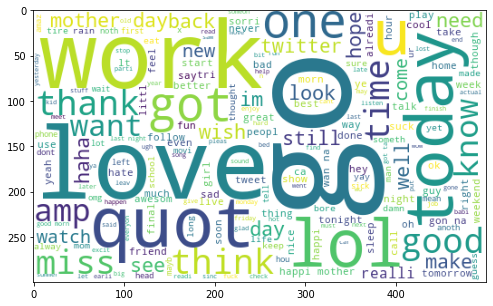

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(cld)

## Word Cloud of the emotion 'Anger'.

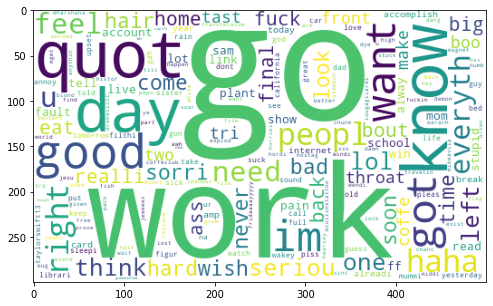

In [ ]:
cl_anger = w_cloud.generate(df[df['sentiment']== 0]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_anger)

## Word Cloud of the emotion 'Boredom'.

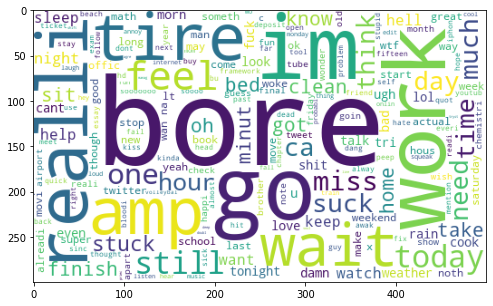

In [ ]:
cl_bore = w_cloud.generate(df[df['sentiment']== 1]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_bore)

## Word Cloud of the emotion 'Empty'.

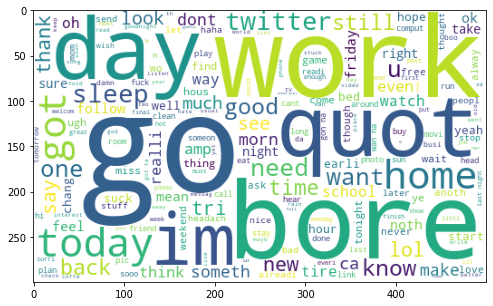

In [ ]:
cl_empty = w_cloud.generate(df[df['sentiment']== 2]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_empty)

## Word Cloud of the emotion 'Enthusiasm'.

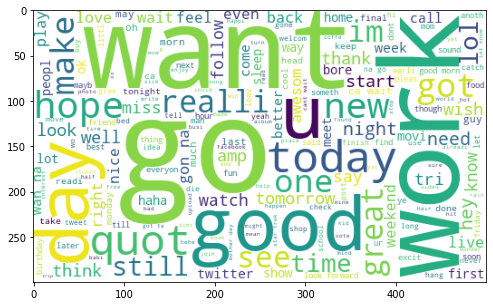

In [ ]:
cl_enthu = w_cloud.generate(df[df['sentiment']== 3]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_enthu)

## Word Cloud of the emotion 'Fun'.

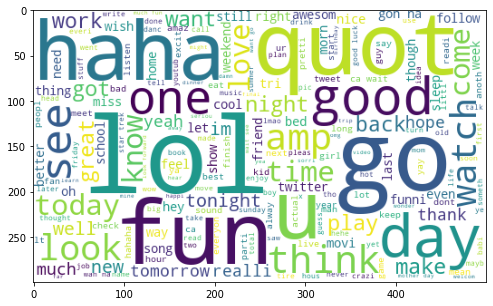

In [ ]:
cl_fun = w_cloud.generate(df[df['sentiment']== 4]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_fun)

## Word Cloud of the emotion 'Happiness'.

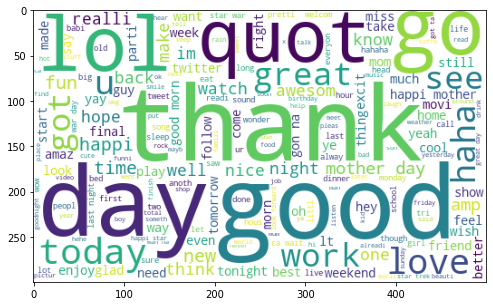

In [ ]:
cl_happy = w_cloud.generate(df[df['sentiment']== 5]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_happy)

## Word Cloud of the emotion 'Hate'.

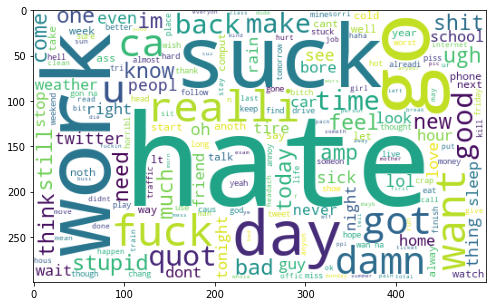

In [ ]:
cl_hate = w_cloud.generate(df[df['sentiment']== 6]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_hate)

## Word Cloud of the emotion 'Love'.

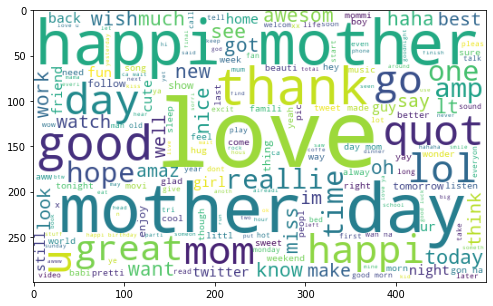

In [ ]:
cl_love = w_cloud.generate(df[df['sentiment']== 7]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_love)

## Word Cloud of the emotion 'Neutral'.

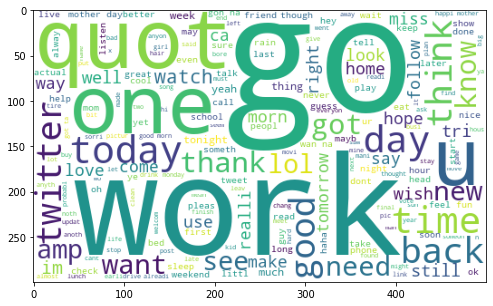

In [ ]:
cl_neu = w_cloud.generate(df[df['sentiment']== 8]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_neu)

## Word Cloud of the emotion 'Relief'.

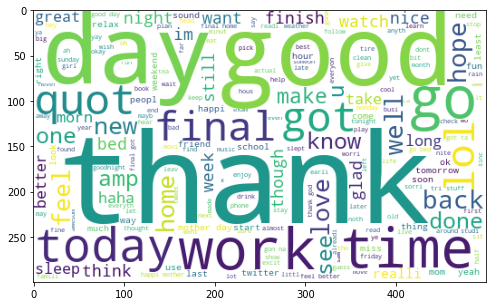

In [ ]:
cl_relf = w_cloud.generate(df[df['sentiment']== 9]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_relf)

## Word Cloud of the emotion 'Sadness'.

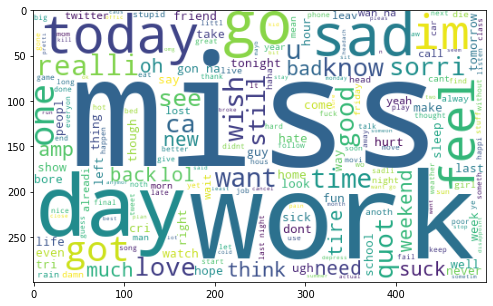

In [ ]:
cl_sad = w_cloud.generate(df[df['sentiment']== 10]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_sad)

## Word Cloud of the emotion 'Surprise'.

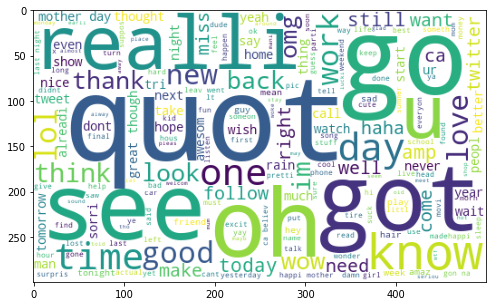

In [ ]:
cl_sur = w_cloud.generate(df[df['sentiment']== 11]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_sur)

## Word Cloud of the emotion 'Worry'.

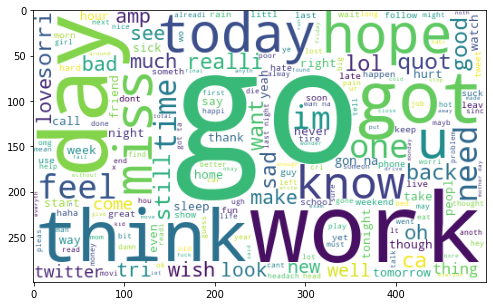

In [ ]:
cl_worry = w_cloud.generate(df[df['sentiment']== 12]['transformed_text'].str.cat(sep = ' '))
plt.figure(figsize=(10,5))
plt.imshow(cl_worry)

# 4. Model Building

In [ ]:
df.to_csv('/content/drive/MyDrive/tweet_emotions_preprocessed.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tweet_emotions_preprocessed.csv')

In [ ]:
df.head()

Unnamed: 0  sentiment                                            content  \
0           0          2  @tiffanylue i know  i was listenin to bad habi...   
1           1         10  Layin n bed with a headache  ughhhh...waitin o...   
2           2         10                Funeral ceremony...gloomy friday...   
3           3          3               wants to hang out with friends SOON!   
4           4          8  @dannycastillo We want to trade with someone w...   

   no_of_characters  no_of_words  no_of_sentences  \
0                92           20                1   
1                60           13                1   
2                35            6                1   
3                36            8                1   
4                86           18                1   

                                    transformed_text  
0  tiffanylu know listenin bad habit earlier star...  
1             layin n bed headach ughhhh waitin call  
2                       funer ceremoni gloomi friday  
3                              want hang friend soon  
4  dannycastillo want trade someon houston ticket...

In [ ]:
df.shape

(39909, 7)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
sentiment            0
content              0
no_of_characters     0
no_of_words          0
no_of_sentences      0
transformed_text    45
dtype: int64

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.isnull().sum()

Unnamed: 0          0
sentiment           0
content             0
no_of_characters    0
no_of_words         0
no_of_sentences     0
transformed_text    0
dtype: int64

In [ ]:
df['sentiment'].value_counts()

8     8590
12    8445
5     5192
10    5158
7     3800
11    2185
4     1776
9     1524
6     1322
2      824
3      759
1      179
0      110
Name: sentiment, dtype: int64

As we can see that the data is imbalanced.
So I'm going to merge some similar class to create new classes with more amount of data. 

In [ ]:
df[df['sentiment'] == 8]

Unnamed: 0  sentiment  \
4               4          8   
10             10          8   
22             22          8   
31             31          8   
32             32          8   
...           ...        ...   
39899       39990          8   
39900       39991          8   
39901       39992          8   
39902       39993          8   
39904       39995          8   

                                                 content  no_of_characters  \
4      @dannycastillo We want to trade with someone w...                86   
10                                      cant fall asleep                16   
22     No Topic Maps talks at the Balisage Markup Con...               120   
31                             @cynthia_123 i cant sleep                25   
32                       I missed the bl***y bus!!!!!!!!                31   
...                                                  ...               ...   
39899  @shonali I think the lesson of the day is not ...                61   
39900  @lovelylisaj can you give me the link for the ...                67   
39901  @jasimmo Ooo showing of your French skills!! l...               118   
39902  @sendsome2me haha, yeah. Twitter has many uses...               108   
39904                                   @JohnLloydTaylor                16   

       no_of_words  no_of_sentences  \
4               18                1   
10               3                1   
22              23                1   
31               5                1   
32              17                2   
...            ...              ...   
39899           14                1   
39900           14                1   
39901           27                3   
39902           26                3   
39904            2                1   

                                        transformed_text  
4      dannycastillo want trade someon houston ticket...  
10                                      cant fall asleep  
22     topic map talk balisag markup confer 2009 prog...  
31                                            cant sleep  
32                                            miss bl bu  
...                                                  ...  
39899                    shonali think lesson day luggag  
39900            lovelylisaj give link kimba diari pleas  
39901  jasimmo ooo show french skill lol thing good l...  
39902  sendsome2m haha yeah twitter mani use know ppl...  
39904                                    johnlloydtaylor  

[8590 rows x 7 columns]

In [ ]:
df.drop(columns='Unnamed: 0', inplace = True)

In [ ]:
df.drop(df[df['sentiment'] == 11].index, inplace = True)

In [ ]:
df.drop(df[df['sentiment'] == 12].index, inplace = True)

In [ ]:
df['sentiment'].value_counts()

8     8590
5     5192
10    5158
7     3800
4     1776
9     1524
6     1322
2      824
3      759
1      179
0      110
Name: sentiment, dtype: int64

In [ ]:
df.shape

(29234, 6)

In [ ]:
df.drop(df[df['sentiment'] == 9].index, inplace = True)

In [ ]:
df.shape

(27710, 6)

In [ ]:
df['sentiment'] = df['sentiment'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27710 entries, 0 to 39908
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentiment         27710 non-null  object
 1   content           27710 non-null  object
 2   no_of_characters  27710 non-null  int64 
 3   no_of_words       27710 non-null  int64 
 4   no_of_sentences   27710 non-null  int64 
 5   transformed_text  27710 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


In [ ]:
df.loc[df['sentiment'] == 'love','sentiment'] = 'love_fun'

In [ ]:
df.loc[df['sentiment'] == '4','sentiment'] = 'love_fun'

In [ ]:
df.loc[df['sentiment'] == '0','sentiment'] = 'anger_hate_bore_empty'

In [ ]:
df.loc[df['sentiment'] == '1','sentiment'] = 'anger_hate_bore_empty'

In [ ]:
df.loc[df['sentiment'] == '2','sentiment'] = 'anger_hate_bore_empty'

In [ ]:
df.loc[df['sentiment'] == '6','sentiment'] = 'anger_hate_bore_empty'

In [ ]:
df['sentiment'].value_counts()

8                        8590
love_fun                 5576
5                        5192
10                       5158
anger_hate_bore_empty    2435
3                         759
Name: sentiment, dtype: int64

In [ ]:
df.loc[df['sentiment'] == '5','sentiment'] = 'happy'

In [ ]:
df.loc[df['sentiment'] == '10','sentiment'] = 'sad'

In [ ]:
df.loc[df['sentiment'] == '8','sentiment'] = 'neutral'

In [ ]:
df.drop(df[df['sentiment'] == '3'].index, inplace = True)

In [ ]:
df['sentiment'].value_counts()

neutral                  8590
love_fun                 5576
happy                    5192
sad                      5158
anger_hate_bore_empty    2435
Name: sentiment, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26951 entries, 0 to 39908
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentiment         26951 non-null  object
 1   content           26951 non-null  object
 2   no_of_characters  26951 non-null  int64 
 3   no_of_words       26951 non-null  int64 
 4   no_of_sentences   26951 non-null  int64 
 5   transformed_text  26951 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.4+ MB


In [ ]:
df.shape

(26951, 6)

In [ ]:
flag = 0
for index, row in df.iterrows():
    if row['sentiment'] == 'neutral':
        flag += 1
        if flag % 4 !=0 :
            df.drop(index, inplace = True)

In [ ]:
df.shape

(20508, 6)

In [ ]:
df['sentiment'].value_counts()

love_fun                 5576
happy                    5192
sad                      5158
anger_hate_bore_empty    2435
neutral                  2147
Name: sentiment, dtype: int64

Here I'm randomly deleting some rows from those classes which have more data points than others.

In [ ]:
flag = 0
for index, row in df.iterrows():
    if row['sentiment'] == 'love_fun':
        flag += 1
        if flag % 2 !=0 :
            df.drop(index, inplace = True)

In [ ]:
df['sentiment'].value_counts()

happy                    5192
sad                      5158
love_fun                 2788
anger_hate_bore_empty    2435
neutral                  2147
Name: sentiment, dtype: int64

In [ ]:
flag = 0
for index, row in df.iterrows():
    if row['sentiment'] == 'happy':
        flag += 1
        if flag % 2 !=0 :
            df.drop(index, inplace = True)

In [ ]:
df['sentiment'].value_counts()

sad                      5158
love_fun                 2788
happy                    2596
anger_hate_bore_empty    2435
neutral                  2147
Name: sentiment, dtype: int64

In [ ]:
flag = 0
for index, row in df.iterrows():
    if row['sentiment'] == 'sad':
        flag += 1
        if flag % 2 !=0 :
            df.drop(index, inplace = True)

In [ ]:
df['sentiment'].value_counts()

love_fun                 2788
happy                    2596
sad                      2579
anger_hate_bore_empty    2435
neutral                  2147
Name: sentiment, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [ ]:
df.sample(10)

sentiment                                            content  \
33165          3  @musicsinmysoul_ http://twitpic.com/4wi78 - hm...   
39205          1               @aussieboby i like it    #masterchef   
34859          3                Going to sleep now goodnight!  xoxo   
7082           0              Waiting in a long line at chick-fil-a   
6704           2  @successorstate yeah it was face2face  nite we...   
4209           2  weekend along with the summer is here so why d...   
6087           3    @Sobk13 Yes, it seems that way - page not found   
9635           1  @youulovemee she is good! so gor-juz yea i kno...   
34259          1  @shaktijs http://twitpic.com/4wkym - Looks Yum...   
35988          2  Took yesterday off &amp; treated myself to an ...   

       no_of_characters  no_of_words  no_of_sentences  \
33165               121           26                2   
39205                36            7                1   
34859                35            7                2   
7082                 37            7                1   
6704                138           31                3   
4209                 59           14                1   
6087                 47           12                1   
9635                132           30                2   
34259                79           17                2   
35988               129           31                1   

                                        transformed_text  
33165      http hmm that bu tour list that cool say 2008  
39205                         aussiebobi like masterchef  
34859                            go sleep goodnight xoxo  
7082                                      wait long line  
6704   successorst yeah face2fac nite went palisad se...  
4209                       weekend along summer feel sad  
6087                       sobk13 ye seem way page found  
9635   youuloveme good yea kno ask yesterday tha hosp...  
34259        shaktij http look yummi haz smal pie pleess  
35988  took yesterday amp treat outfit amp shoe treat...

In [ ]:
df.to_csv('/content/drive/MyDrive/tweet_emotions_preprocessed1.csv')

In [ ]:
df.isnull().sum()

sentiment           0
content             0
no_of_characters    0
no_of_words         0
no_of_sentences     0
transformed_text    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
vec1 = CountVectorizer()
vec2 = TfidfVectorizer()

In [ ]:
X1 = vec1.fit_transform(df['transformed_text']).toarray()

In [ ]:
X2 = vec2.fit_transform(df['transformed_text']).toarray()

In [ ]:
y = df['sentiment'].values

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state = 8)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 8)

In [ ]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [ ]:
gnb1.fit(X1_train, y1_train)

GaussianNB()

In [ ]:
y1_pred_gnb = gnb1.predict(X1_test)

In [ ]:
accuracy_score(y1_test, y1_pred_gnb)

0.2271821442805899

In [ ]:
mnb1.fit(X1_train, y1_train)

MultinomialNB()

In [ ]:
y1_pred_mnb = mnb1.predict(X1_test)

In [ ]:
accuracy_score(y1_test, y1_pred_mnb)

0.41889198884017537

In [ ]:
bnb1.fit(X1_train, y1_train)

BernoulliNB()

In [ ]:
y1_pred_bnb = bnb1.predict(X1_test)

In [ ]:
accuracy_score(y1_test, y1_pred_bnb)

0.3965723395775209

In [ ]:
gnb2 = GaussianNB()
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()

In [ ]:
gnb2.fit(X2_train, y2_train)

GaussianNB()

In [ ]:
y2_pred_gnb = gnb2.predict(X2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_gnb)

0.23435631725787165

In [ ]:
mnb2.fit(X2_train, y2_train)

MultinomialNB()

In [ ]:
y2_pred_mnb = mnb2.predict(X2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_mnb)

0.39298525308888005

In [ ]:
bnb2.fit(X2_train, y2_train)

BernoulliNB()

In [ ]:
y2_pred_bnb = bnb2.predict(X2_test)

In [ ]:
accuracy_score(y2_test, y2_pred_bnb)

0.3965723395775209

Till now the Multinomial Naive Bayes with Countvectorizer is giving better accuracy though it can be improved a lot. I'll update the model in future using some other techniques.
Right now I'm dumping this model to deploy it in a web app...

In [ ]:
import pickle

In [ ]:
pickle.dump(mnb1, open('model.pkl', 'wb'))

In [ ]:
pickle.dump(vec1, open('count_vectorizer.pkl', 'wb'))